<a href="https://colab.research.google.com/github/Ash-git-create/Data_Analytics_1_WiSe2024/blob/main/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 4**

Importing the dataset from local machine

In [23]:
from google.colab import files
uploaded = files.upload()

Importing the adult dataset

In [70]:
import pandas as pd

data = pd.read_csv("adult.data", header=None, na_values="?", skipinitialspace=True) #Here null values are indicated as ?, so we add that as a null value during import
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Renaming the improted columns

In [71]:
columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race",
    "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

data.columns = columns
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Checking and handling missing values

In [72]:
print(data.isnull().sum()) #Checking the columns with null values to replace them with mode

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [74]:
#Imputing the null values with mode
data["workclass"].fillna(data["workclass"].mode()[0], inplace=True)
data["occupation"].fillna(data["occupation"].mode()[0], inplace=True)
data["native_country"].fillna(data["native_country"].mode()[0], inplace=True)

print(data.isnull().sum()) #Checking if the imputing worked

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Removing some entries from column age to then predict them using predictive modelling imputation

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Replacing 10% values of age column with null value
percentage_missing = 0.1
num_missing = int(len(data) * percentage_missing)
rng = np.random.default_rng(42)
missing_indices = rng.choice(data.index, size=num_missing, replace=False)
data.loc[missing_indices, 'age'] = np.nan

print(data.isnull().sum())

x = data[['education_num']]
y = data['age']

model = LinearRegression()
model.fit(x[y.notnull()], y[y.notnull()])
data.loc[y.isnull(), 'age'] = model.predict(x[y.isnull()])
print('\nThe null values after imputation :\n')
print(data.isnull().sum())

age               3256
workclass            0
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
dtype: int64

The null values after imputation :

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


Adding noise and noise handling

In [76]:
from scipy.ndimage import gaussian_filter

# Adding random noise to 'hours_per_week'
data['hours_per_week_noisy'] = data['hours_per_week'] + np.random.normal(0, 1, size=data.shape[0])

# Smoothing the noise
data['hours_per_week_smoothed'] = gaussian_filter(data['hours_per_week_noisy'], sigma=1)
data['hours_per_week_smoothed'] = data['hours_per_week_smoothed'].astype(int)

print(data[['hours_per_week', 'hours_per_week_noisy', 'hours_per_week_smoothed']].head())


   hours_per_week  hours_per_week_noisy  hours_per_week_smoothed
0              40             40.035978                       32
1              13             13.795420                       29
2              40             39.792370                       33
3              40             39.747321                       38
4              40             39.817075                       38


Handling outliers using z-score

In [77]:
#Calculating z score
data['hours_per_week_zscore'] = (data['hours_per_week'] - data['hours_per_week'].mean()) / data['hours_per_week'].std()
outliers = data[np.abs(data['hours_per_week_zscore']) > 3]#considering outliers as values who has z score >3

# Handling outliers by capping them (transformation)
data['hours_per_week_capped'] = data['hours_per_week']
data.loc[np.abs(data['hours_per_week_zscore']) > 3, 'hours_per_week_capped'] = data['hours_per_week'].mean()

print("Outliers handled:")
print(data[['hours_per_week', 'hours_per_week_zscore', 'hours_per_week_capped']].head(11))


Outliers handled:
    hours_per_week  hours_per_week_zscore  hours_per_week_capped
0               40              -0.035429              40.000000
1               13              -2.222119              13.000000
2               40              -0.035429              40.000000
3               40              -0.035429              40.000000
4               40              -0.035429              40.000000
5               40              -0.035429              40.000000
6               16              -1.979153              16.000000
7               45               0.369514              45.000000
8               50               0.774456              50.000000
9               40              -0.035429              40.000000
10              80               3.204112              40.437456


<ipython-input-77-23582af9ced0>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '40.437455852092995' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[np.abs(data['hours_per_week_zscore']) > 3, 'hours_per_week_capped'] = data['hours_per_week'].mean()


Scaling

In [89]:
#Scaling for numerical features using Standardization (Z-score)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_columns = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print("Scaled data using Standardizaton:")
print(data['age'].head())

# Normalization (Min-Max Scaling)
minmax_scaler = MinMaxScaler()
data[numerical_columns] = minmax_scaler.fit_transform(data[numerical_columns])

print("\nScaled data using Normalizaton:")
print(data[numerical_columns].head())

Scaled data using Standardizaton:
0    0.035282
1    0.886016
2   -0.042058
3    1.118034
4   -0.815453
Name: age, dtype: float64

Scaled data using Normalizaton:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  


Feature Selection

In [78]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif

features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
target = (data['income'] == ' >50K').astype(int)  # Binary target

# Calculate mutual information scores
mi = mutual_info_classif(data[features], target)
print("Mutual Information:\n", pd.Series(mi, index=features))

Mutual Information:
 age               0.000246
fnlwgt            0.000000
education_num     0.001275
capital_gain      0.000000
capital_loss      0.000015
hours_per_week    0.001827
dtype: float64


In [79]:
#Backward RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=3)  # Select 3 most important features
rfe.fit(data[features], target)
print("Feature Ranking (Backward RFE):\n",features)

print("\nRFE Support (Backward RFE):\n", rfe.support_)

Feature Ranking (Backward RFE):
 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

RFE Support (Backward RFE):
 [False False False  True  True  True]


In [97]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(data[numerical_columns], target)

lasso_importance = np.abs(lasso.coef_)
print("Lasso Feature Importance:\n", pd.Series(lasso_importance, index=features))
print("Feature Variance:\n", data[features].var())

#Varience is very close to 0, hence there is no importance given to any feature by Lasso regression model

Lasso Feature Importance:
 age               0.0
fnlwgt            0.0
education_num     0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
dtype: float64
Feature Variance:
 age               0.031374
fnlwgt            0.005139
education_num     0.029417
capital_gain      0.005454
capital_loss      0.008558
hours_per_week    0.015875
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Comparing the models


Feature Comparison :
           Feature  Mutual Information    RFE  Lasso
0             age            0.000246  False    0.0
1          fnlwgt            0.000000  False    0.0
2   education_num            0.001275  False    0.0
3    capital_gain            0.000000   True    0.0
4    capital_loss            0.000015   True    0.0
5  hours_per_week            0.001827   True    0.0


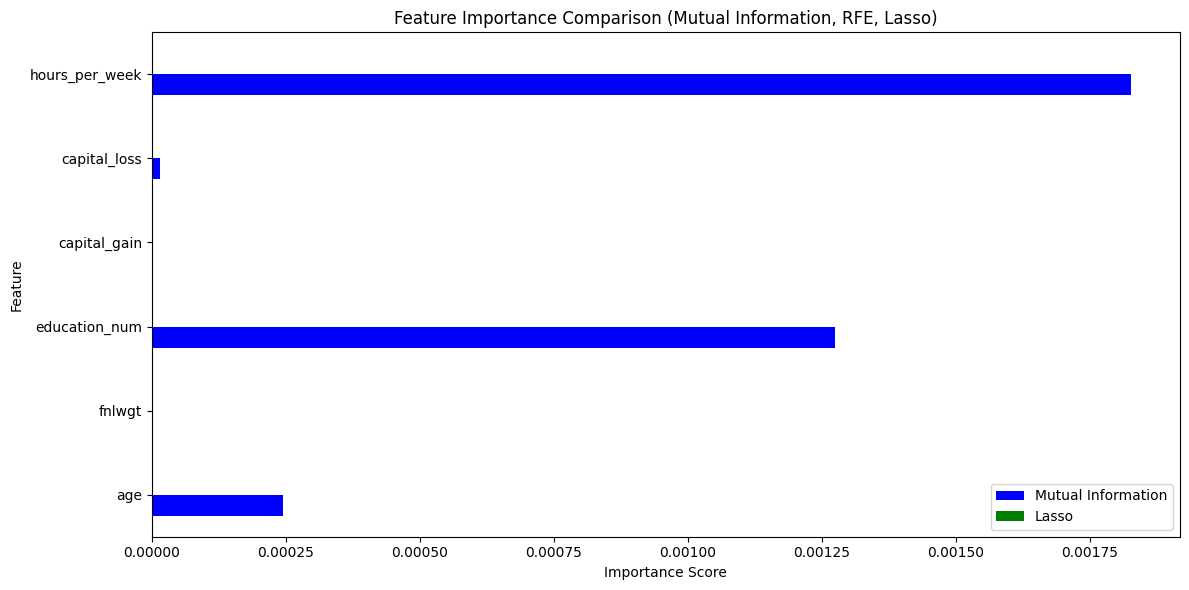

In [100]:
#Comparing the models
import matplotlib.pyplot as plt

comparison_df = pd.DataFrame({'Feature': features,'Mutual Information': mi,'RFE': rfe.support_,'Lasso': lasso_importance})
print("\nFeature Comparison :\n", comparison_df)

fig, axes = plt.subplots(1, 1, figsize=(12, 6))

comparison_df.set_index('Feature').plot(kind='barh', ax=axes, color=['blue', 'green', 'coral'])
axes.set_title("Feature Importance Comparison (Mutual Information, RFE, Lasso)")
axes.set_xlabel("Importance Score")
plt.tight_layout()
plt.show()